1. Read the image texture.tif. Display the image. How many textures are there in the
image? Describe them.

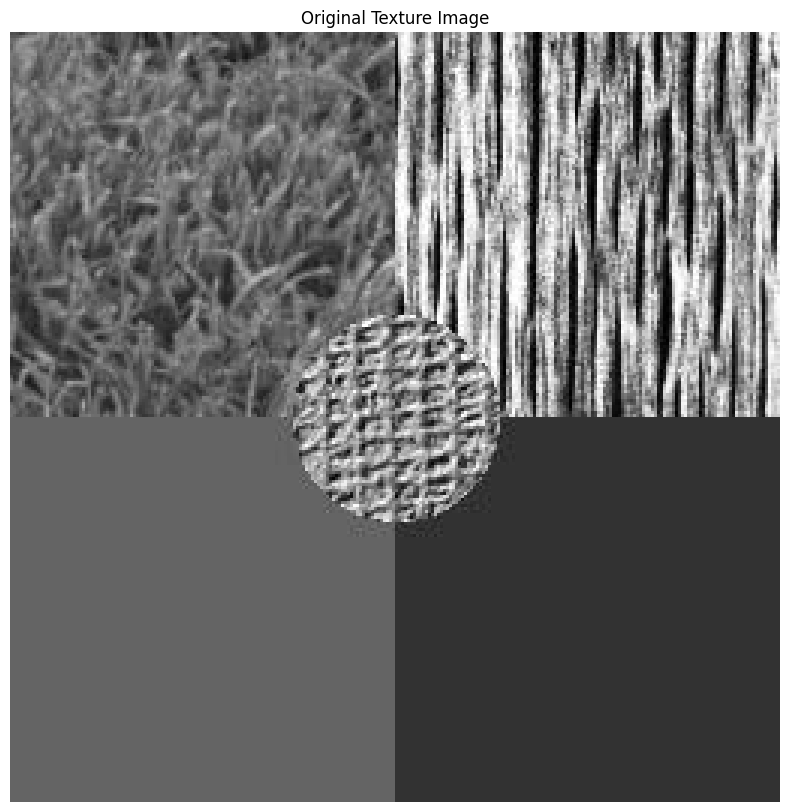

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


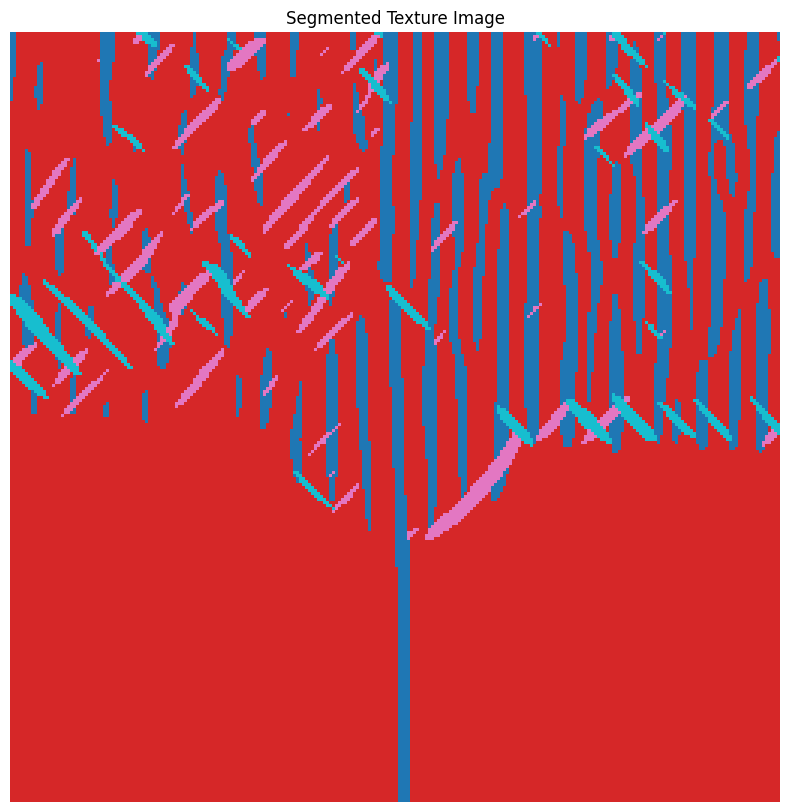

Number of Textures: 4
Texture 1: Cluster 0
Texture 2: Cluster 1
Texture 3: Cluster 2
Texture 4: Cluster 3


In [41]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image in grayscale
image_path = '/content/texture.tif'  # Update with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.title('Original Texture Image')
plt.axis('off')
plt.show()

# Gabor filter parameters
ksize = 31
sigma = 4.0
theta_list = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Different orientations
lamda = 10.0
gamma = 0.5
phi = 0

# Apply Gabor filters
def apply_gabor_filters(image, theta_list):
    features = []
    for theta in theta_list:
        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
        fimg = cv2.filter2D(image, cv2.CV_8UC3, kernel)
        features.append(fimg)
    return features

# Extract features
filtered_images = apply_gabor_filters(image, theta_list)
features = np.array(filtered_images)
features = features.reshape(len(theta_list), -1).T

# Normalize features
features = (features - features.mean(axis=0)) / features.std(axis=0)

# Cluster the features using KMeans
n_clusters = 4  # Assume there are 4 different textures
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(features)
labels = kmeans.labels_.reshape(image.shape)

# Plot the segmented image
plt.figure(figsize=(10, 10))
plt.imshow(labels, cmap='tab10')
plt.title('Segmented Texture Image')
plt.axis('off')
plt.show()

# Print the number of textures
print(f"Number of Textures: {n_clusters}")

# Descriptions for the identified textures
for i in range(n_clusters):
    print(f"Texture {i+1}: Cluster {i}")


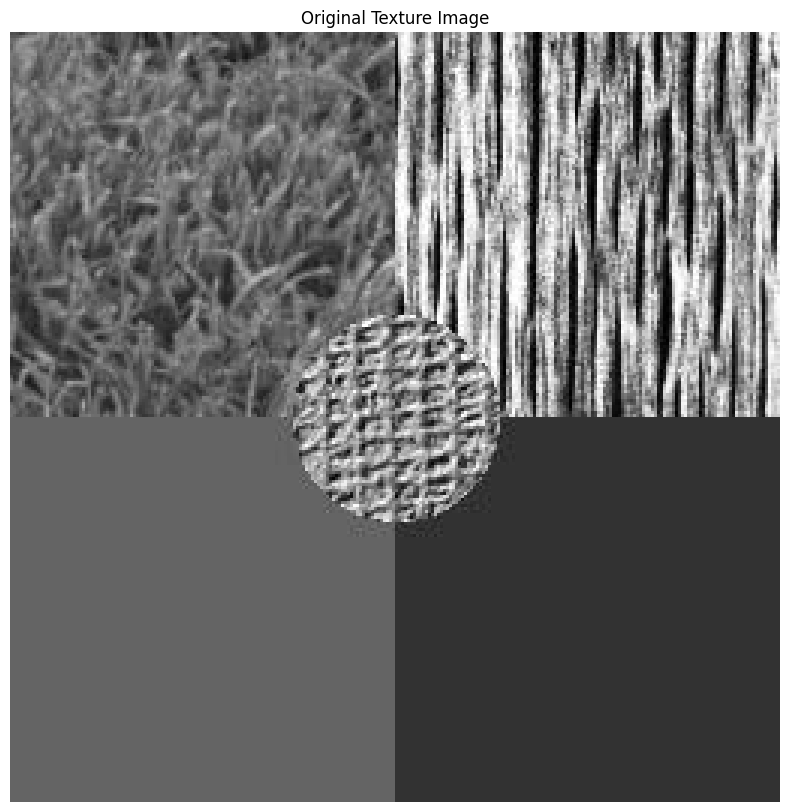

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


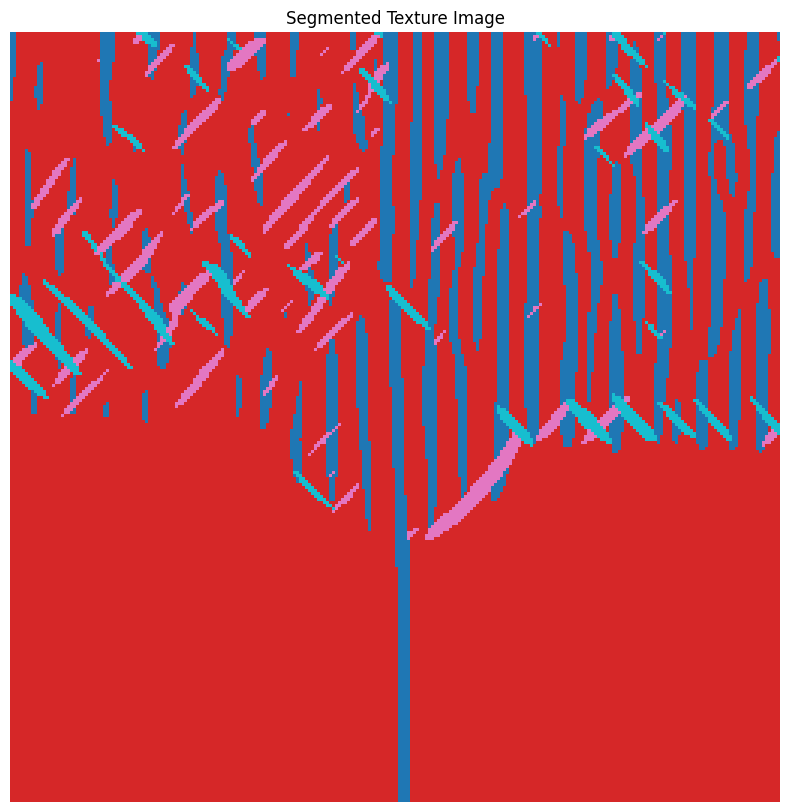

Number of Textures: 4
Texture 1: Cluster 0
  Contrast: 2832.58
  Correlation: -0.07
  Energy: 0.73
  Homogeneity: 0.73
Texture 2: Cluster 1
  Contrast: 8668.98
  Correlation: -0.16
  Energy: 0.31
  Homogeneity: 0.47
Texture 3: Cluster 2
  Contrast: 388.21
  Correlation: -0.01
  Energy: 0.94
  Homogeneity: 0.94
Texture 4: Cluster 3
  Contrast: 269.91
  Correlation: -0.00
  Energy: 0.96
  Homogeneity: 0.96


In [55]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.feature import graycomatrix, graycoprops

# Load the image in grayscale
image_path = '/content/texture.tif'  # Path to the uploaded image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.title('Original Texture Image')
plt.axis('off')
plt.show()

# Gabor filter parameters
ksize = 31
sigma = 4.0
theta_list = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Different orientations
lamda = 10.0
gamma = 0.5
phi = 0

# Apply Gabor filters
def apply_gabor_filters(image, theta_list):
    features = []
    for theta in theta_list:
        kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
        fimg = cv2.filter2D(image, cv2.CV_8UC3, kernel)
        features.append(fimg)
    return features

# Extract features
filtered_images = apply_gabor_filters(image, theta_list)
features = np.array(filtered_images)
features = features.reshape(len(theta_list), -1).T

# Normalize features
features = (features - features.mean(axis=0)) / features.std(axis=0)

# Cluster the features using KMeans
n_clusters = 4  # Assume there are 4 different textures
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(features)
labels = kmeans.labels_.reshape(image.shape)

# Plot the segmented image
plt.figure(figsize=(10, 10))
plt.imshow(labels, cmap='tab10')
plt.title('Segmented Texture Image')
plt.axis('off')
plt.show()

# Print the number of textures
print(f"Number of Textures: {n_clusters}")

# Function to describe the texture
def describe_texture(clustered_image, cluster_label):
    mask = (clustered_image == cluster_label).astype(np.uint8)
    texture_region = cv2.bitwise_and(image, image, mask=mask)
    glcm = graycomatrix(texture_region, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)

    contrast = graycoprops(glcm, 'contrast')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

    return {
        'contrast': contrast,
        'correlation': correlation,
        'energy': energy,
        'homogeneity': homogeneity
    }

# Describe each texture cluster
for i in range(n_clusters):
    texture_features = describe_texture(labels, i)
    print(f"Texture {i+1}: Cluster {i}")
    print(f"  Contrast: {texture_features['contrast']:.2f}")
    print(f"  Correlation: {texture_features['correlation']:.2f}")
    print(f"  Energy: {texture_features['energy']:.2f}")
    print(f"  Homogeneity: {texture_features['homogeneity']:.2f}")


2. Select several features and calculate them on blocks of size of 12 × 12 using Gabor
filter. Display the calculated features and estimate which ones can be used to segment
given structure.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Feature: [169.45138888888889, 86.53795168250934], Cluster: 1
Feature: [153.4375, 77.35512612745482], Cluster: 0
Feature: [212.53472222222223, 37.70811016406234], Cluster: 1
Feature: [96.61805555555556, 58.84914760637501], Cluster: 0
Feature: [170.36111111111111, 70.70189875565097], Cluster: 1
Feature: [165.625, 86.0020893641544], Cluster: 1
Feature: [140.51388888888889, 76.22517684385221], Cluster: 0
Feature: [174.36111111111111, 88.94221056949087], Cluster: 1
Feature: [148.49305555555554, 85.95129406689983], Cluster: 0
Feature: [146.40972222222223, 91.5041296270924], Cluster: 0
Feature: [183.48611111111111, 86.90639809197587], Cluster: 1
Feature: [105.79861111111111, 72.70952289963957], Cluster: 0
Feature: [219.48611111111111, 67.9994879587657], Cluster: 1
Feature: [88.38194444444444, 36.21061011786497], Cluster: 0
Feature: [231.625, 48.02196762940894], Cluster: 1
Feature: [101.18055555555556, 41.977284329639026], Cluster: 0
Feature: [205.80555555555554, 67.796291870264], Cluster: 1
F

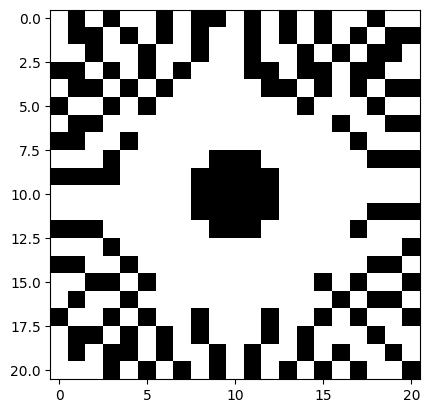

In [46]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# Define Gabor filter
def build_filters():
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 16):
        kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        kern /= 1.5*kern.sum()
        filters.append(kern)
    return filters

# Apply Gabor filter
def process(img, filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum

# Load image
img = cv2.imread('/content/testpat1.tif',0)

# Apply filters to the image
filters = build_filters()
res = process(img, filters)

# Split image into 12x12 blocks and calculate features
features = []
for i in range(0, img.shape[0] - img.shape[0] % 12, 12):
    for j in range(0, img.shape[1] - img.shape[1] % 12, 12):
        block = res[i:i+12, j:j+12]
        feature = [np.mean(block), np.std(block)]  # Add more features if needed
        features.append(feature)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(features)
labels = kmeans.labels_

# Display features and K-means results
for i, feature in enumerate(features):
    print(f"Feature: {feature}, Cluster: {labels[i]}")

# Reshape labels into the shape of the original image
labels_reshaped = np.reshape(labels, (img.shape[0]//12, img.shape[1]//12))

# Display the clusters
plt.imshow(labels_reshaped, cmap='gray')
plt.show()

3.	Calculate the spectra energy (without the DC component) feature on the texture.tif image, on the blocks of size 12×12. Is this feature good for segmentation of the textures on this image? Segment the energy image using the K-means method and comment on the results.

In [56]:
import numpy as np
import cv2
from scipy.fftpack import fft2

# Load image
img = cv2.imread('/content/texture.tif', 0)

# Split image into 12x12 blocks and calculate spectral energy
spectral_energies = []
for i in range(0, img.shape[0] - img.shape[0] % 12, 12):
    for j in range(0, img.shape[1] - img.shape[1] % 12, 12):
        block = img[i:i+12, j:j+12]

        # Apply 2D Fourier Transform
        f = fft2(block)

        # Calculate spectral energy (excluding DC component)
        energy = np.sum(np.abs(f[1:, 1:])**2)
        spectral_energies.append(energy)

# Print spectral energies
for i, energy in enumerate(spectral_energies):
    print(f"Block {i}: Spectral Energy = {energy}")

Block 0: Spectral Energy = 4234448.999999999
Block 1: Spectral Energy = 3153744.0
Block 2: Spectral Energy = 5580795.999999999
Block 3: Spectral Energy = 7009419.999999999
Block 4: Spectral Energy = 9241512.999999998
Block 5: Spectral Energy = 6374760.999999999
Block 6: Spectral Energy = 6223160.999999999
Block 7: Spectral Energy = 4655473.0
Block 8: Spectral Energy = 6659912.999999998
Block 9: Spectral Energy = 3773232.999999999
Block 10: Spectral Energy = 11471747.999999996
Block 11: Spectral Energy = 9435624.999999996
Block 12: Spectral Energy = 13317423.999999996
Block 13: Spectral Energy = 6003528.999999999
Block 14: Spectral Energy = 8403993.0
Block 15: Spectral Energy = 17472900.0
Block 16: Spectral Energy = 11790984.999999998
Block 17: Spectral Energy = 22034144.999999996
Block 18: Spectral Energy = 12443520.999999996
Block 19: Spectral Energy = 17187131.999999993
Block 20: Spectral Energy = 8858937.0
Block 21: Spectral Energy = 2801787.9999999995
Block 22: Spectral Energy = 35

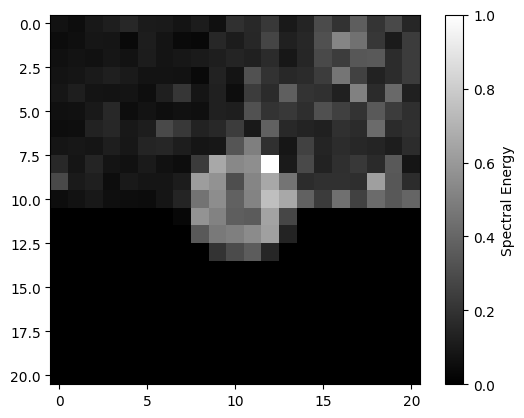

In [57]:
import matplotlib.pyplot as plt

# Reshape spectral energies into the shape of the original image
spectral_energies_reshaped = np.reshape(spectral_energies, (img.shape[0]//12, img.shape[1]//12))

# Normalize the energies for better visualization
spectral_energies_reshaped = spectral_energies_reshaped / np.max(spectral_energies_reshaped)

# Display the spectral energies
plt.imshow(spectral_energies_reshaped, cmap='gray')
plt.colorbar(label='Spectral Energy')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


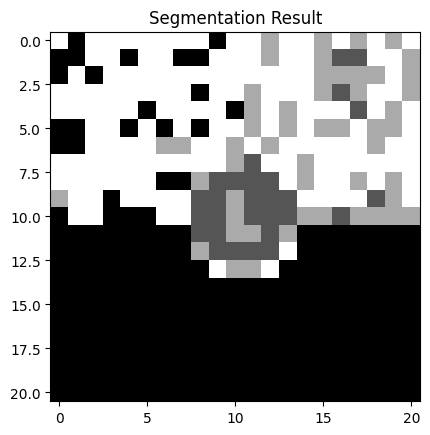

In [59]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Reshape the spectral energy into a 2D array
X = spectral_energies_reshaped.reshape(-1, 1)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

# Reshape the labels into the shape of the original image
labels = kmeans.labels_.reshape(spectral_energies_reshaped.shape)

# Display the segmentation result
plt.imshow(labels, cmap='gray')
plt.title('Segmentation Result')
plt.show()

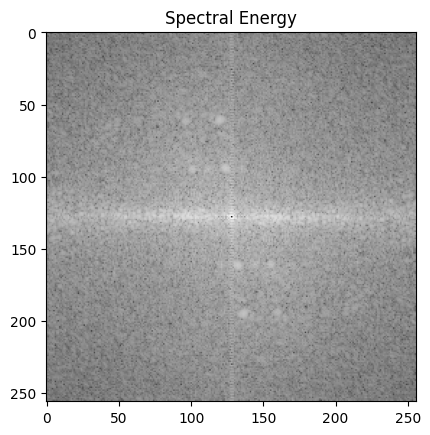

In [60]:
# Calculate the Fourier transform of the image
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Calculate the magnitude spectrum
magnitude_spectrum = np.abs(fshift)

# Remove the DC component (zero frequency)
magnitude_spectrum[img.shape[0]//2, img.shape[1]//2] = 0

# Calculate the spectral energy
spectral_energy = magnitude_spectrum ** 2

# Display the spectral energy
plt.imshow(np.log1p(spectral_energy), cmap='gray')
plt.title('Spectral Energy')
plt.show()


4. By using segmentation and cv2.inpaint restore the “Efac.jpg” image. In your report explain
the steps you used to achieve it.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


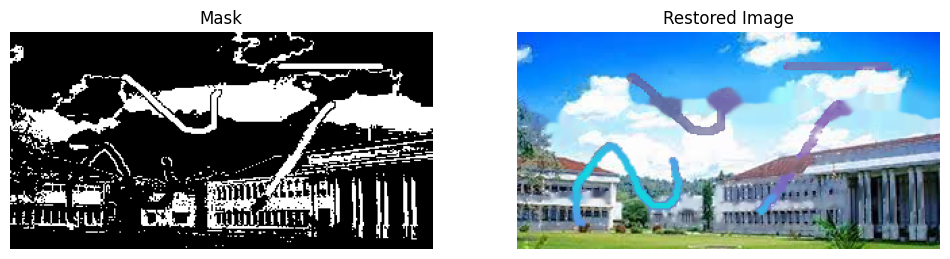

In [33]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Efac.jpg')

# Reshape the image to a 2D array of pixels
pixels = image.reshape(-1, 3)

# Perform K-means clustering to segment the image
kmeans = KMeans(n_clusters=5)
kmeans.fit(pixels)

# Create a mask of the segmented areas
mask = kmeans.labels_.reshape(image.shape[:2])

# Choose one of the clusters to inpaint
mask = np.where(mask == 1, 255, 0).astype('uint8')

# Perform inpainting on the color image
restored_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_NS)

# Convert the restored image to RGB
restored_image_rgb = cv2.cvtColor(restored_image, cv2.COLOR_BGR2RGB)

# Display the mask and the restored image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(restored_image_rgb)
plt.title("Restored Image")
plt.axis('off')

plt.show()

without K means clustering

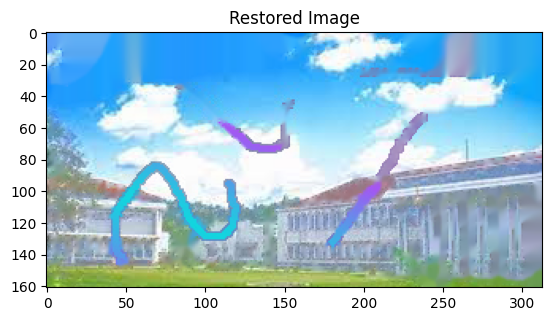

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the damaged image
damaged_img_path = 'Efac.jpg'  # Replace with the correct path to the damaged image
damaged_img = cv2.imread(damaged_img_path)

# Check if image is loaded correctly
if damaged_img is None:
    raise FileNotFoundError(f"Unable to load image {damaged_img_path}")

# Convert the image to grayscale for creating the mask
gray = cv2.cvtColor(damaged_img, cv2.COLOR_BGR2GRAY)

# Create a binary mask of the damaged areas
_, mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Perform inpainting on the color image
restored_img = cv2.inpaint(damaged_img, mask, 3, cv2.INPAINT_NS)

# Display the restored image
plt.imshow(cv2.cvtColor(restored_img, cv2.COLOR_BGR2RGB))
plt.title('Restored Image')
plt.show()